In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
sns.set(color_codes=True)

In [6]:
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src/semi_supervised'

In [7]:
from sample_seeds import read_warriner_ratings
csv_path = '../../data/epa/Ratings_Warriner_et_al.csv'
voc = read_warriner_ratings(csv_path)

{'V': {'Min': 1.26, 'Max': 8.53}, 'D': {'Min': 1.68, 'Max': 7.9}, 'A': {'Min': 1.6, 'Max': 7.79}}


In [10]:
def plot(voc, axis):
    x = np.array([voc[w][axis] for w in voc.keys()])
    sns.distplot(x)
    y = np.abs(x)
    sns.distplot(y)
    print(np.mean(y))
    mu = np.mean(x)
    sigma = np.std(x)
    return (x - mu) / sigma

In [14]:
def plot_dist(x, mu, sigma):
    count, bins, ignored = plt.hist(x, 100, density=True)
    
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
             linewidth=2, color='r')
    plt.show()

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.2351899941185942


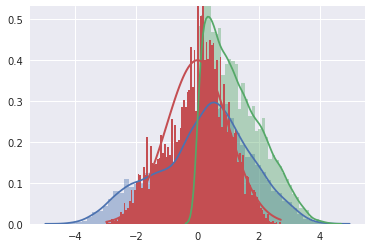

In [17]:
e = plot(voc, 'E')
plot_dist(e, 0, 1)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.1841950160708503


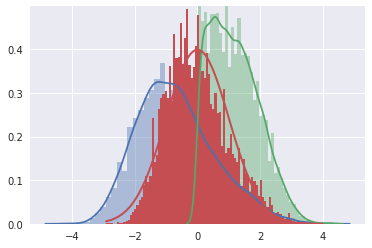

In [18]:
p = plot(voc, 'P')
plot_dist(p, 0, 1)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.158678155726863


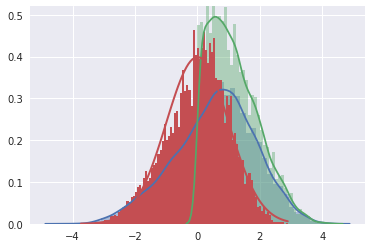

In [19]:
a = plot(voc, 'A')
plot_dist(a, 0, 1)

In [ ]:
x = np.load('../../result/semi-supervised/matrix.npy')

In [28]:
import csv
def plot_vad(filepath, v, a, d):
    with open(filepath) as csvfile:
        reader = csv.DictReader(csvfile)
        V = []
        A = []
        D = []
        for row in reader:
            V.append(float(row[v]))
            A.append(float(row[a]))
            D.append(float(row[d]))
    sns.distplot(V)
    sns.distplot(A)
    sns.distplot(D)
    print(np.std(V))
    print(np.std(A))
    print(np.std(D))
    return V, A, D

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.2748457403939735
0.8963808609391528
0.9382503711171208


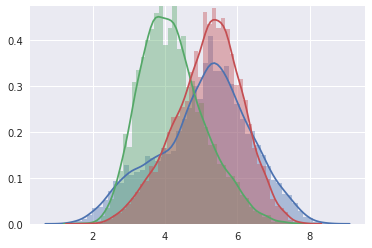

In [29]:
v, a, d = plot_vad('../../data/epa/Ratings_Warriner_et_al.csv', 'V.Mean.Sum', 'A.Mean.Sum', 'D.Mean.Sum')

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.9933190028422674
1.0588900286391583
1.019324070616811


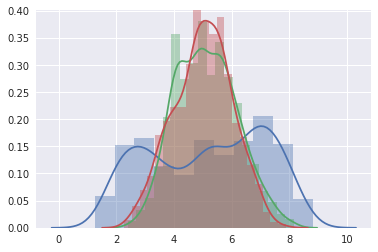

In [30]:
v, a, d = plot_vad('../../data/epa/anew/all.csv', 'Valence Mean', 'Arousal Mean', 'Dominance Mean')

In [31]:
def plot_epa(filepath):
    with open(filepath) as csvfile:
        reader = csv.reader(csvfile)
        E = []
        P = []
        A = []
        for row in reader:
            E.append(float(row[1]))
            P.append(float(row[2]))
            A.append(float(row[3]))
    sns.distplot(E)
    sns.distplot(P)
    sns.distplot(A)
    print(np.std(E))
    print(np.std(P))
    print(np.std(A))
    return E, P, A

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.5283437219421554
0.8221693964141453
0.7438259473828538


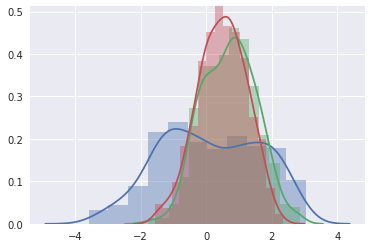

In [32]:
e, p, a = plot_epa('../../data/epa/bayesact/fbehaviours.dat')

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.4502189627776905
1.1072063807619608
0.8768487842267901


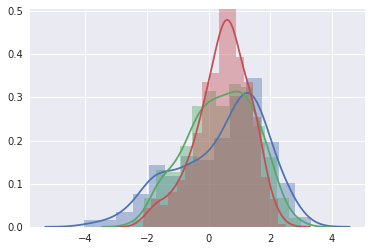

In [33]:
e, p, a = plot_epa('../../data/epa/bayesact/fidentities.dat')